<a href="https://colab.research.google.com/github/rilschultz/CS167Notes/blob/main/Day23_CNN_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day22
## CNN Code

#### CS167: Machine Learning, Spring 2023

Thursday, April 20th, 2023

📆 [Course Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vSvFV5Mz0_YZE1d5r3gQ8IMktE4cBAsJIlP30cl2GhEpSO0J-YWV62QokSDz-OcOCsEmxMuKpY0kVlR/pubhtml?gid=0&single=true) | 🙋[PollEverywhere](https://pollev.com/meredithmoore011) | 📜 [Syllabus](https://analytics.drake.edu/~moore/cs167_s23_syllabus.html) | 📬 [CodePost Login](https://codepost.io/login)

# Admin Stuff

You should be working on:
- [Notebook #6](https://classroom.github.com/a/pUdpmxBH) is due April 25th by 11:59pm 

## Load your data:

Download `catdogdata.zip` from Bb, and unzip in in your Google Drive.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Quick Review:

# Image Data
Image data is represented as a two-dimensional grid of pixels, either grayscale (monochromatic) or color (RBG). 
- each pixel corresponds to one or multiple numeric values: if it's grayscale, it is one number, if it's color, it corresponds to 3 numbers (a red, a green and a blue value). 

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_rgb.png?raw=1" width=500/>
</div>


# Convolutional Neural Networks: Spatial Relations

Pixels in images have a very stron __local dependence__.
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_local.png?raw=1" width=800/>
</div>


![convolution](https://media3.giphy.com/media/i4NjAwytgIRDW/giphy.gif)

# Convolution Dimension Math

The dimensions of the output of a convolution are _usually_ different than the input dimension of the convolution. 

The following equation demonstrates how to calculate the output size of a convolution:

$$output dim  = [ (W - K + 2P) / S] + 1$$

Where:
- $W$ is the input size
- $K$ is the kernel size
- $P$ is the padding
- $S$ is the stride

# Max Pooling Layer:

Image data can get really computationally inefficient, really quickly. To avoid this, we often toss in a layer that helps us to __summarize__ and __downsample__ the data. 

The most common layer after a convolutional layer is called a __Max Pooling Layer__, and it's goal is to locally summarize the convolution. 

It performs something like a convolution, but rather than taking the dot product, it takes the maximum element in the filter area. 

![max-pooling](https://developers.google.com/static/machine-learning/practica/image-classification/images/maxpool_animation.gif)

# Pulling it all together:

Okay, so we've talked about __image data__, __dot product__, __convolutions__, __max pooling__, and I've promised that we'll be able to pull off some computer vision. Let's connect the dots.

Things to notice:
- input is an image (in this case a color image, so 3 channels--red,green, and blue)
- There are several filters, not just one.
- `Conv2D` layers with `ReLU` are often followed by `maxpool` 
- Towards the end of the model, we switch to fully connected (`Dense`) layer
- We have as many output nodes as we have classes to predict.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_cnn_architecture.svg?raw=1" width=800/>
</div>

[[img src](https://developers.google.com/machine-learning/practica/image-classification)]

## 🙋 PollEverywhere 

# ✨ New Material

## Overview:

Today, we're going to train 3 different models:
1. __MNIST__: handwritten digit recognition
2. __Cat or Dog__: Binary Classification between cat and dog
3. __Arctic Wildlife__: Multiclass classification between Polar Bear, Walrus, and Arctic Fox
 

### Inputting Data
Each of these datasets will be loaded in using a different method--all are viable, but for Notebook #6, I encourage you to use the method that we use in the Cat v Dog model. 

### Downloading Data:
Go ahead and download `catdogdata.zip`, put it in your Drive and unzip it like we did with `arctic-wildlife.zip`.

## Enable GPUs
Go to 'Edit' and then 'Notebook Settings'. In the 'Hardware Accelerator' dropdown menu, select 'GPU'. This means that Colab will run on a GPU from Google rather than a CPU which will accelerate our training.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Let's jump back in where we left off:

## A Simple Example: MNIST

The MNIST dataset is a famous dataset used to train ML models and neural networks to recognize handwriten digits. Things to know:
- each digit in the dataset consists of a 28x28 array of numbers representing pixel values from 0 to 255.
- the dataset is included as part of Keras/Tensorflow.

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_mnist.png?raw=1" width=800/>
</div>

## Load the data:

In this case, Keras already has MNIST available, we just have to call `mnist.load_data()` to import our data.
- don't get too used to this... data prep/loading is often a pretty big part of computer vision.

In [3]:
from keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()
print(f'train_images: {train_images.shape}')
print(f'y_train: {y_train.shape}')
print(f'test_images: {test_images.shape}')
print(f'y_test: {y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
train_images: (60000, 28, 28)
y_train: (60000,)
test_images: (10000, 28, 28)
y_test: (10000,)


Plot the first 50 images and show the corresponding labels.

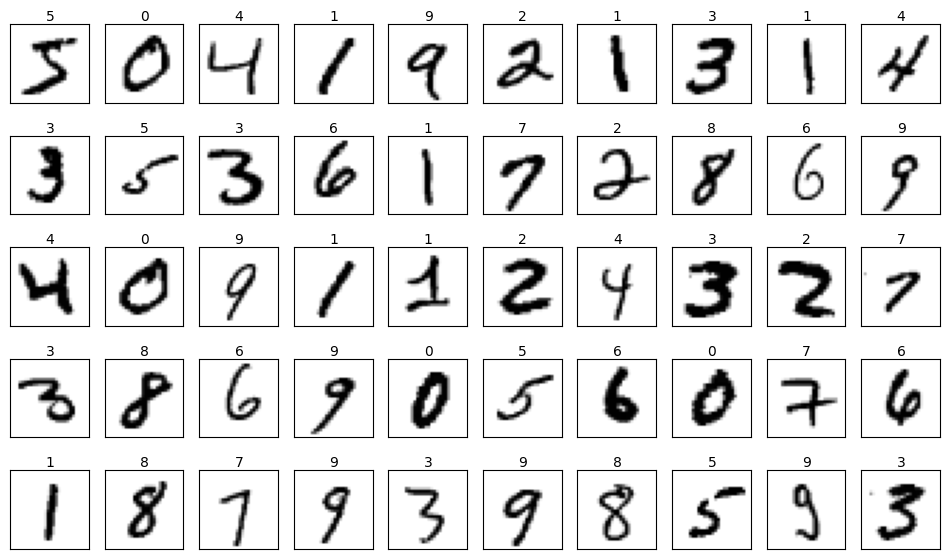

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(y_train[i]), transform=ax.transAxes)

Reshape the image data for input to a CNN and normalize the pixel values by dividing them by 255:

In [5]:
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255

Create a convolutional neural network with a `softmax` activation function in the output layer with ______ nodes:

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D(2, 2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary(line_length=80)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d (Conv2D)                    (None, 26, 26, 32)              320         
                                                                                
 max_pooling2d (MaxPooling2D)       (None, 13, 13, 32)              0           
                                                                                
 conv2d_1 (Conv2D)                  (None, 11, 11, 64)              18496       
                                                                                
 max_pooling2d_1 (MaxPooling2D)     (None, 5, 5, 64)                0           
                                                                                
 flatten (Flatten)                  (None, 1600)                    0           
                                                                                
 dense (

In [7]:
hist1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)

Epoch 1/10
1200/1200 [==============================] - 17s 4ms/step - loss: 0.1454 - accuracy: 0.9554 - val_loss: 0.0516 - val_accuracy: 0.9847
Epoch 2/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0372 - val_accuracy: 0.9875
Epoch 3/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0426 - val_accuracy: 0.9845
Epoch 4/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0363 - val_accuracy: 0.9887
Epoch 5/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0322 - val_accuracy: 0.9895
Epoch 6/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0144 - accuracy: 0.9950 - val_loss: 0.0372 - val_accuracy: 0.9883
Epoch 7/10
1200/1200 [==============================] - 5s 4ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0363 - val_accuracy

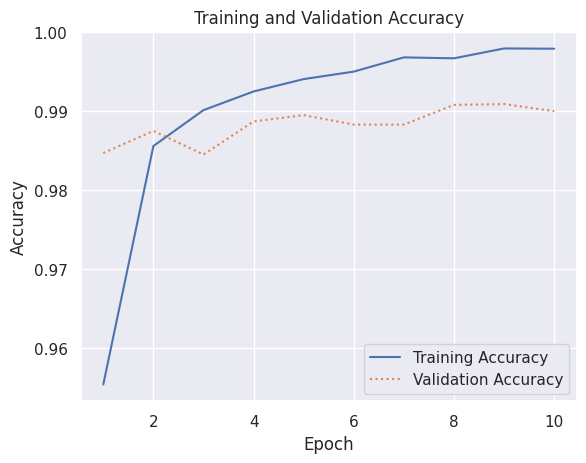

In [8]:
import seaborn as sns
sns.set()

acc = hist1.history['accuracy']
val_acc = hist1.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

How accurate is the model?

In [9]:
scores = model1.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {scores[1]:.1%}')

Accuracy: 99.0%


Show one of the test images:

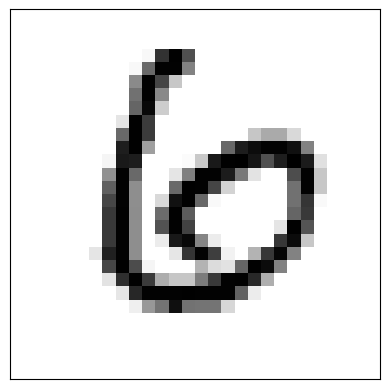

In [10]:
sns.reset_orig()
test_image = test_images[11]
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_image, cmap=plt.cm.gray_r)

Use the test image to make a prediction:

In [11]:
x = test_image.reshape(1, 28, 28, 1) / 255
model1.predict(x)

1/1 [==============================] - 0s 208ms/step


array([[5.9970376e-11, 4.8082973e-15, 2.9980647e-19, 2.4063505e-18,
        7.1762983e-14, 4.0552045e-12, 1.0000000e+00, 1.2894945e-21,
        2.1240560e-13, 6.8725487e-17]], dtype=float32)

Get the predicted class:

In [12]:
import numpy as np

predicted_class = np.argmax(model1.predict(x), axis=1)[0]
print('Looks like a ' + str(predicted_class) + '!')

1/1 [==============================] - 0s 17ms/step
Looks like a 6!


# Model #2: Cats v Dogs:

Make sure that the `catdogdata.zip` file is loaded and unzipped in your Drive. Then, let's start by loading in our necessary libraries:

In [13]:
# baseline model for the dogs vs cats dataset
import keras
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

# Cat or Dog?
Is this a cat or a dog?
<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/ace.png?raw=1" width=300/>
</div>



In [22]:
# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/datasets/catdogdata/train' #2000 images
test_data_dir = '/content/drive/MyDrive/datasets/catdogdata/test'   #400 images

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32


# Load the data
If you get a 'File not found' error here and you're sure your path is correct, make sure you unzipped the `catdogdata.zip` file. 

You may need to use a plugin if you want to unzip on Drive. Instead you can download it to your local machine, unzip it on your local machine and then upload to Drive. Uploading/upzipping on Drive may take a while (Mine took about 20 minutes). 

## Keras Data Generators:

Sometimes when you try to load in a dataset, your machine does not have enough memory. This is a pretty common problem in ML these days. 

Keras provides a solution to this problem by using what are called __data generators__. 
- A __generator__ is basically a special class that will efficiently feed our model batches of data to train without overwhelming our computer's memory.

In [19]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 2400 images belonging to 2 classes.


## Let's build our model
This is a very simple CNN, without any max pooling layers.

In [20]:
#setting up a sequential model with 3 convolutional layers, each with 32 feature maps
#from regions that are 3x3 in the image
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

## `fit()` v `fit_generator()`:

This uses a different function (`fit_generator`) than the previous model which used `fit()`.

When we use the `fit()` function, we are making a few assumptions:
- that the entire training set can fit into Random Access Memory (RAM) of the computer
- calling `fit()` on an already trained model will not re-initialize our already trained weights, so making successive calls to fit if we want to and it will keep training our model. 
- There is no need for using the Keras generators (i.e. no data augmentation

When we use `fit_generator`, we generally are using __data generators__ from the `ImageDataGenerator` class to input our data. 

In [21]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/5
75/75 [==============================] - 412s 5s/step - loss: 0.4809 - accuracy: 0.8333 - val_loss: 0.4857 - val_accuracy: 0.8333
Epoch 2/5
75/75 [==============================] - 23s 312ms/step - loss: 0.4549 - accuracy: 0.8333 - val_loss: 0.4446 - val_accuracy: 0.8333
Epoch 3/5
75/75 [==============================] - 23s 303ms/step - loss: 0.4464 - accuracy: 0.8333 - val_loss: 0.4398 - val_accuracy: 0.8333
Epoch 4/5
75/75 [==============================] - 23s 306ms/step - loss: 0.4438 - accuracy: 0.8333 - val_loss: 0.4216 - val_accuracy: 0.8333
Epoch 5/5
75/75 [==============================] - 23s 313ms/step - loss: 0.4220 - accuracy: 0.8333 - val_loss: 0.4126 - val_accuracy: 0.8354


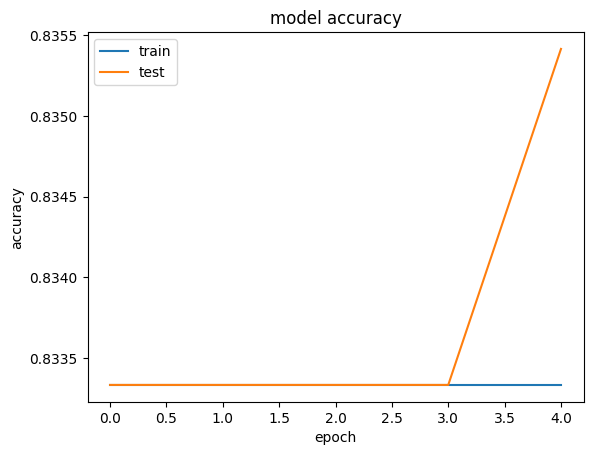

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 💬 Group Discussion:

How did this model do? 
- Any ideas how we could make it perform better?
- Do we think this is a complex enough model to be sufficiently predictive? Why or why not?

# Let's add Max Pooling Layers

Now, in between our `Conv2D` layers, let's add in some `MaxPooling2D` layers to downsample and summarize the information:

In [24]:

#We'll try a second model, this time with pooling layers after each convolutional layer
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=10, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/10
75/75 [==============================] - 23s 301ms/step - loss: 0.4849 - accuracy: 0.8087 - val_loss: 0.4576 - val_accuracy: 0.8333
Epoch 2/10
75/75 [==============================] - 32s 432ms/step - loss: 0.4586 - accuracy: 0.8333 - val_loss: 0.4562 - val_accuracy: 0.8333
Epoch 3/10
75/75 [==============================] - 22s 298ms/step - loss: 0.4568 - accuracy: 0.8333 - val_loss: 0.4553 - val_accuracy: 0.8333
Epoch 4/10
75/75 [==============================] - 21s 285ms/step - loss: 0.4554 - accuracy: 0.8333 - val_loss: 0.4539 - val_accuracy: 0.8333
Epoch 5/10
75/75 [==============================] - 22s 295ms/step - loss: 0.4549 - accuracy: 0.8333 - val_loss: 0.4541 - val_accuracy: 0.8333
Epoch 6/10
75/75 [==============================] - 22s 297ms/step - loss: 0.4527 - accuracy: 0.8333 - val_loss: 0.4591 - val_accuracy: 0.8333
Epoch 7/10
75/75 [==============================] - 22s 296ms/step - loss: 0.4544 - accuracy: 0.8333 - val_loss: 0.4569 - val_accuracy: 0.8333

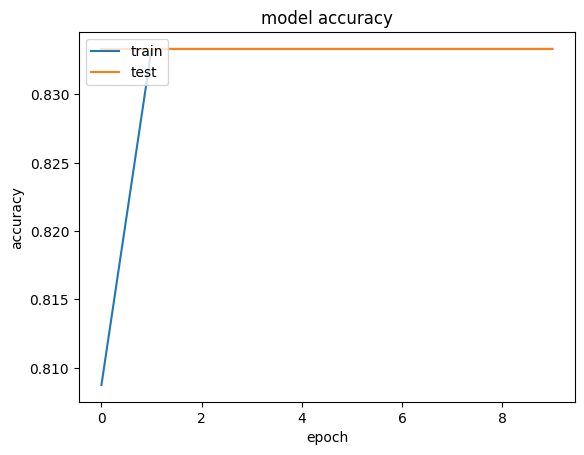

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 💬 Discussion Questions:
What differences do we notice between `model1` and `model2`?
- which one trained faster? Why?
- which on performed better?

Any ideas as to how we can get our models to perform better?

# Now, try your own image:

In [27]:
from IPython.display import Image
display(Image('images/ace.jpg', width=200, height=300))

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>

In [ ]:
#try your own image..

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img = load_img("images/Ace.jpg", target_size=(200, 200))
#img = load_img("cat_pic.jpeg", target_size=(200, 200))

# convert to array
img = img_to_array(img)
# reshape into a single sample with 3 channels

img = img.reshape(1, 200, 200, 3)
img = img.astype('float32')
#convert image from [0,255] to [0,1]
img = datagen.standardize(img)

# predict the class  # 0 is cat; 1 is dog
result = model2.predict(img)

if result > 0.5:
    print("It's a dog!",result)
else:
    print("It's a cat!", result)

It's a dog! [[0.7014556]]


# Another Example: Arctic Wildlife

<div>
<img src="https://github.com/merriekay/S23-CS167-Notes/blob/main/images/day22_wildlife.png?raw=1" width=800/>
</div>

## Load training and testing images
The first step is to load the images that will be used for training and testing and to label theimages with: 
- 0 for Arctic Foxes
- 1 for Polar Bears
- 2 for Walruses



## Some Helper Functions:

In [28]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
 
def load_images_from_path(path, label):
    images, labels = [], []
 
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
         
    return images, labels
 
def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
 
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
 
x_train, y_train, x_test, y_test = [], [], [], []

## We've got some foxes

Load in a few images and show the first fews

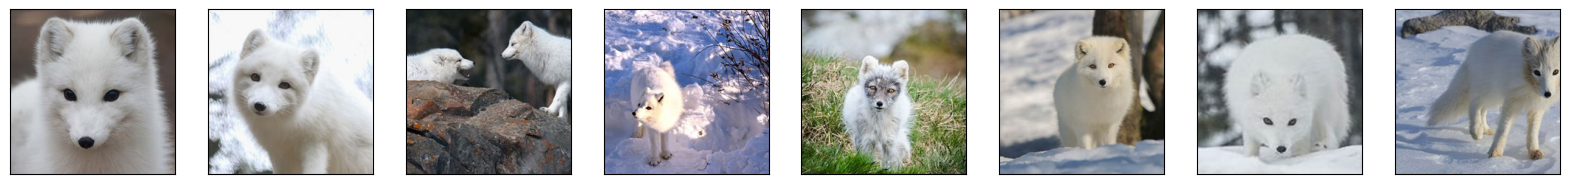

In [30]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Wildlife/train/arctic_fox', 0)
show_images(images)
    
x_train += images
y_train += labels

## Polar Bears:

Let's see some brrrrrrs

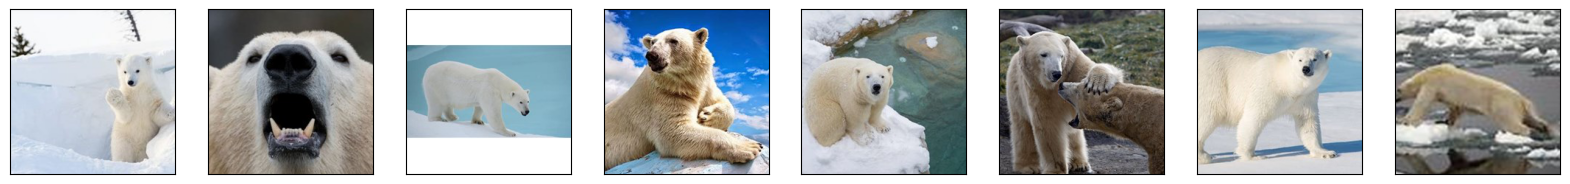

In [31]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Wildlife/train/polar_bear', 1)
show_images(images)
    
x_train += images
y_train += labels

## And... Walruses:

Here is your daily dose of walruses

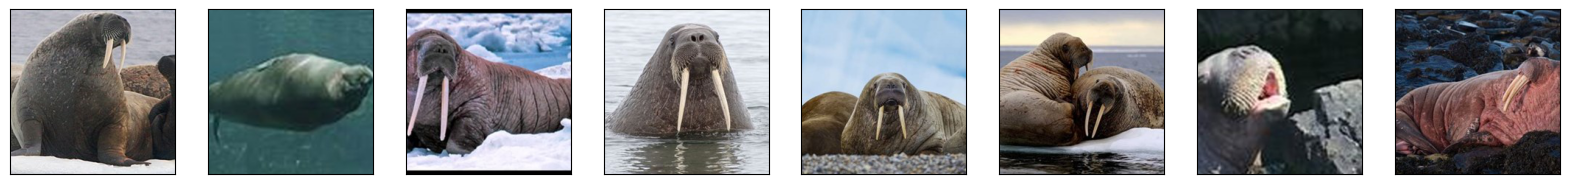

In [32]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Wildlife/train/walrus', 2)
show_images(images)

x_train += images
y_train += labels

## Let's see what our Test Set looks like:

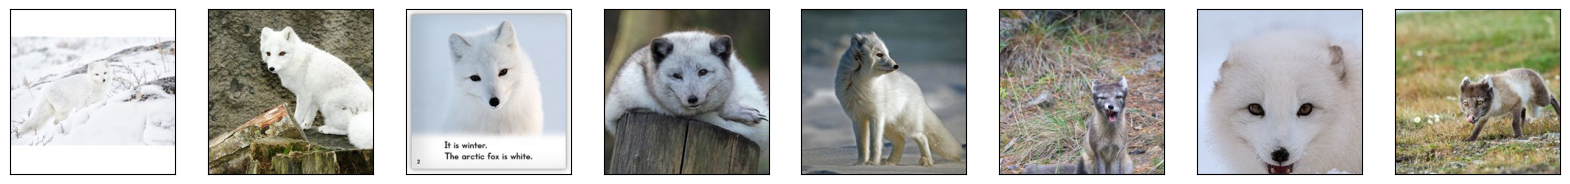

In [33]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Wildlife/test/arctic_fox', 0)
show_images(images)
    
x_test += images
y_test += labels

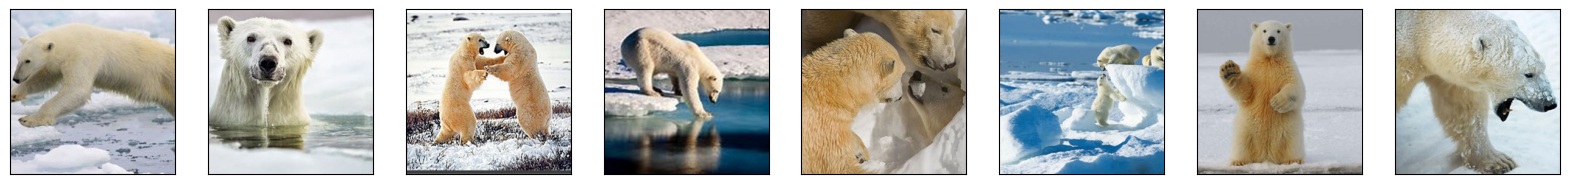

In [34]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Wildlife/test/polar_bear', 1)
show_images(images)
    
x_test += images
y_test += labels

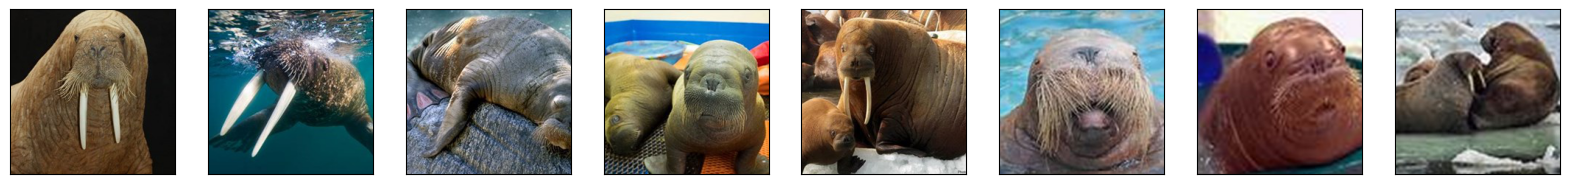

In [35]:
images, labels = load_images_from_path('/content/drive/MyDrive/datasets/Wildlife/test/walrus', 2)
show_images(images)
    
x_test += images
y_test += labels

## Preprocess the training and testing images
Pixels range in values from 0-255, so dividing by 255 will essentially normalize the pixel values.

In [36]:
import numpy as np
 
x_train = np.array(x_train) / 255 # normalize pixel values
x_test = np.array(x_test) / 255

y_train = np.array(y_train)
y_test = np.array(y_test)

## Build and train a CNN

Keras makes it easy to build and train CNNs using classes such as Conv2d and MaxPooling2D. 

This model has:
- 5 convolution and pooling layers
- one pair of fully connected layers for classification

Quick Quiz: 
- How many neurons should be in the output layer?
- What should the activation of the output layer be?

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

Model: "sequential_3"
________________________________________________________________________________
 Layer (type)                       Output Shape                    Param #     
 conv2d_8 (Conv2D)                  (None, 222, 222, 32)            896         
                                                                                
 max_pooling2d_5 (MaxPooling2D)     (None, 111, 111, 32)            0           
                                                                                
 conv2d_9 (Conv2D)                  (None, 109, 109, 64)            18496       
                                                                                
 max_pooling2d_6 (MaxPooling2D)     (None, 54, 54, 64)              0           
                                                                                
 conv2d_10 (Conv2D)                 (None, 52, 52, 64)              36928       
                                                                                
 max_p

In [38]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=5)

Epoch 1/5
30/30 [==============================] - 4s 27ms/step - loss: 1.1181 - accuracy: 0.3467 - val_loss: 1.0887 - val_accuracy: 0.3333
Epoch 2/5
30/30 [==============================] - 1s 18ms/step - loss: 1.0715 - accuracy: 0.3900 - val_loss: 0.9530 - val_accuracy: 0.5833
Epoch 3/5
30/30 [==============================] - 1s 18ms/step - loss: 0.8488 - accuracy: 0.5667 - val_loss: 0.8753 - val_accuracy: 0.5500
Epoch 4/5
30/30 [==============================] - 1s 18ms/step - loss: 0.7756 - accuracy: 0.6600 - val_loss: 0.7774 - val_accuracy: 0.6833
Epoch 5/5
30/30 [==============================] - 1s 18ms/step - loss: 0.7057 - accuracy: 0.6567 - val_loss: 0.7865 - val_accuracy: 0.6083


How well did the CNN train? Let's plot the training accuracy and validation accuracy for each epoch.

[]

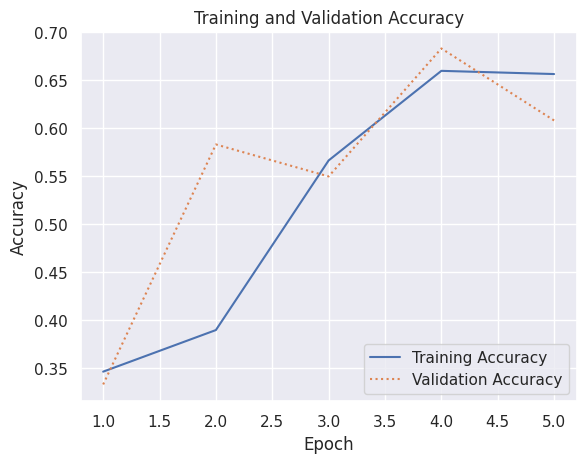

In [39]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()